In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
all_data = pd.read_csv("/Users/christianpederjacobsen/Dropbox/Mac/Desktop/leg/peptide_immunogenicity/old_data (enter at own risk)/filtered_data_IEDB_4_tested_len_9_10_full_HLA_IFNg_assay_w_parts_w_IEDB_prediction.csv")
all_data

,Unnamed: 0.2,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,peptide,HLA_allele,potential,tested_subjects,positive_subjects,immunogenicity,parts,binding_score,IEDB_predictions
0,0,0,0,5,AAGIGILTV,HLA-A*02:01,0.833333,4.0,4.0,Positive,6.0,6.0,0.31652
1,1,1,1,6,AALFFFDID,HLA-A*02:01,0.250000,10.0,2.0,Positive,2.0,2.0,0.43488
2,2,2,2,10,AAVKAGAAL,HLA-B*07:02,0.750000,2.0,2.0,Positive,0.0,0.0,-0.07772
3,3,3,3,25,ADVEFCLSL,HLA-B*44:03,0.500000,6.0,3.0,Positive,8.0,8.0,0.07138
4,4,4,4,125,AELEGVWQPA,HLA-B*40:06,0.666667,1.0,1.0,Positive,9.0,9.0,0.27462
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5537,5537,5538,5538,27637,FTGSEVENV,HLA-A*02:01,0.083333,10.0,0.0,Negative,1.0,1.0,0.06161
5538,5538,5539,5539,27638,FTSHEHFGL,HLA-A*02:01,0.083333,10.0,0.0,Negative,9.0,9.0,0.22540
5539,5539,5540,5540,27667,MQVIGDQYV,HLA-A*02:01,0.083333,10.0,0.0,Negative,3.0,3.0,0.10128
5540,5540,5541,5541,27685,SQEPMSIYV,HLA-A*02:01,0.083333,10.0,0.0,Negative,0.0,0.0,-0.19523


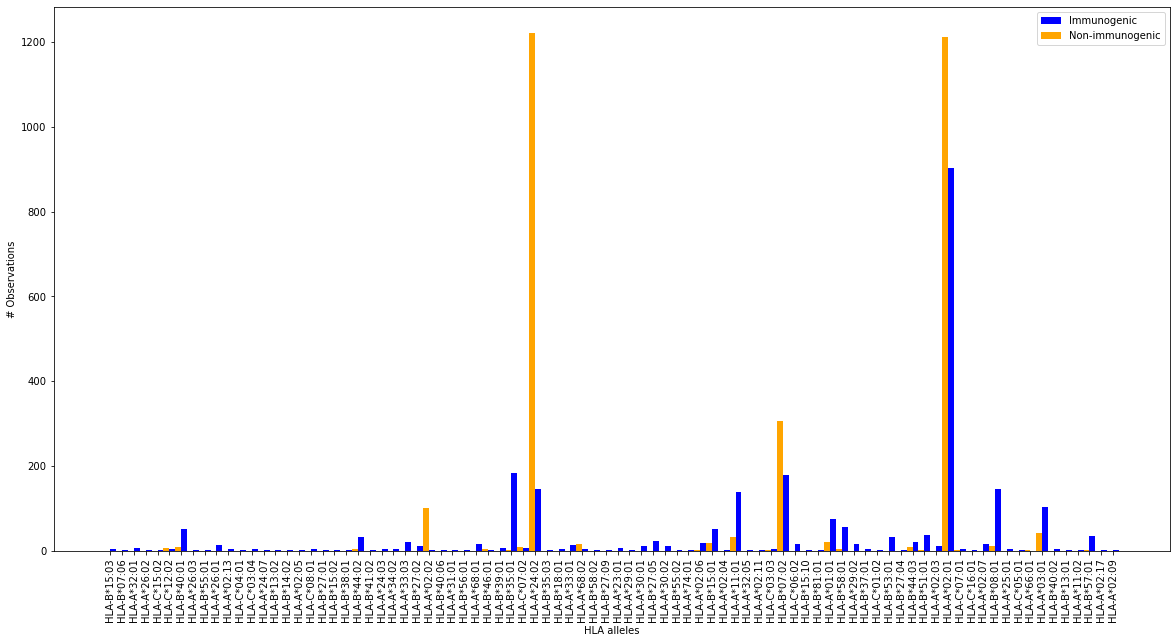

In [12]:
fig = plt.figure(figsize=(20,10))
unique_HLAS = list(set(all_data["HLA_allele"]))

for i,HLA in enumerate(unique_HLAS):
    immunogenic_subjects = len(all_data[(all_data["HLA_allele"] == HLA) & (all_data["immunogenicity"] == "Positive")])
    non_immunogenic_subjects = len(all_data[(all_data["HLA_allele"] == HLA) & (all_data["immunogenicity"] == "Negative")])
    plt.bar(i + 0.25,immunogenic_subjects,color='blue', width=0.5,label="Immunogenic")
    plt.bar(i - 0.25,non_immunogenic_subjects,color='orange', width=0.5,label="Non-immunogenic")

plt.xticks(np.arange(len(unique_HLAS)),unique_HLAS,rotation=90)
plt.xlabel("HLA alleles")
plt.ylabel("# Observations")
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())
plt.show()

In [20]:
# hla_database = pd.read_csv('../data/formatted_hla2paratope_MHC_pseudo.dat', sep=' ',index_col=0)
hla_database = pd.read_csv('../data/MHC_full.dat', sep=' ',index_col=0)
# hla_database = pd.read_csv('../data/MHC_full.dat', sep=' ',index_col=0)
hla_dic = hla_database.to_dict("dict")["pseudo"]

In [21]:
HLA_Alleles_in_data = [hla_dic[x] for x in hla_dic.keys() if x in [x.replace(":","") for x in all_data["HLA_allele"]]]

In [22]:
print("\n".join(HLA_Alleles_in_data))

MAVMAPRTLLLLLLGALALTQTWAGSHSMRYFTTSVSRPGRGEPRFIAVGYVDDTQFVRFDSDAASQRMEPRAPWIEQEGPEYWDLQTRNVKAQSQTDRANLGTLRGYYNQSEAGSHTIQMMYGCDVGSDGRFLRGYRQDAYDGKDYIALNEDLRSWTAADMAAQITQRKWEAARVAEQLRAYLEGTCVEWLRRYLENGKETLQRTDAPKTHMTHHAVSDHEATLRCWALSFYPAEITLTWQRDGEDQTQDTELVETRPAGDGTFQKWASVVVPSGQEQRYTCHVQHEGLPKPLTLRWEPSSQPTIPIVGIIAGLVLFGA-VFAGAVVAAVRWRRKSSDRKGGSYSQAASSDSAQGSDMSLTACKV
MAVMAPRTLVLLLSGALALTQTWAGSHSMRYFFTSVSRPGRGEPRFIAVGYVDDTQFVRFDSDAASRRMEPRAPWIEQEGPEYWDGETRKVKAHSQTHRVDLGTLRGYYNQSEAGSHTLQRMYGCDVGSDWRFLRGYHQYAYDGKDYIALKEDLRSWTAADMAAQTTKHKWEAAHVAEQWRAYLEGTCVEWLRRYLENGKETLQRTDAPKTHMTHHAVSDHEATLRCWALSFYPAEITLTWQRDGEDQTQDTELVETRPAGDGTFQKWAAVVVPSGQEQRYTCHVQHEGLPKPLTLRWEPSSQPTIPIVGIIAGLVLFGA-VITGAVVAAVMWRRKSSDRKGGSYSQAASSDSAQGSDVSLTACKV
MAVMAPRTLVLLLSGALALTQTWAGSHSMRYFFTSVSRPGRGEPRFIAVGYVDDTQFVRFDSDAASQRMEPRAPWIEQEGPEYWDGETRKVKAHSQTHRVDLGTLRGYYNQSEAGSHTVQRMYGCDVGSDWRFLRGYHQYAYDGKDYIALKEDLRSWTAADMAAQTTKHKWEAAHVAEQLRAYLEGTCVEWLRRYLENGKETLQRTDAPKTHMTHHAVSDHEATLRCWALSFYPAEITLTWQRDGEDQTQDTELVETRPAGDGTFQ

In [ ]:

def visualize_activations(model,valid_loaders):
    peptide_val_loader,HLA_val_loader,label_val_loader,binding_score_val_loader = valid_loaders
    model.eval()
    with torch.no_grad():
        for j in range(len(peptide_val_loader)):
            for obs in range(len(peptide_val_loader[j])):
                val_peptide = peptide_val_loader[j][obs].unsqueeze(0).to(device)
                val_HLA = HLA_val_loader[j][obs].unsqueeze(0).to(device)
                val_label = label_val_loader[j][obs].unsqueeze(0).to(device)
                output = model(val_peptide,val_HLA)
                if output > 0.95:
                    ## Return activations function.
                    activation = {}
                    def get_activation(name):
                        def hook(model, input, output):
                            activation[name] = output.detach()
                        return hook
                    model.L_in.register_forward_hook(get_activation('L_in'))
                    output = model(val_peptide,val_HLA)

                    activations = activation['L_in'].numpy().reshape(-1)
                    plt.hist(activations)
                    plt.show()
                    print(activations.shape)

                    sys.exit(1)


visualize_activations(trained_model,val_loaders)